In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools
import sklearn
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from pandas.tseries.offsets import DateOffset


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('dataset.xlsx', index_col='Region/Country/Economy')

In [4]:
df.sample(10)

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region/Country/Economy,,,,,,,,,,,,,,,,,,,,,
France,63.769,62.605,62.897,62.542,61.26,62.809,62.034,60.645,59.038,56.695,...,30.538,28.689,28.783,29.572,29.99,29.135,28.918,28.559,29.6,31.109
Colombia,45.999,47.074,49.091,49.837,43.707,44.611,44.808,47.899,49.585,46.937,...,42.929,43.515,43.717,43.616,41.023,44.837,40.581,42.416,43.586,42.742
Guatemala,19.774,21.114,21.33,21.413,21.613,19.413,21.124,23.169,24.519,26.537,...,24.977,25.456,28.553,28.442,26.748,28.738,29.35,26.08,27.081,..
South Sudan,..,..,..,..,..,..,..,..,..,..,...,51.333,51.432,55.435,53.869,50.29,54.488,55.21,54.531,54.496,..
Luxembourg,96.853,92.483,94.014,82.705,80.69,84.664,83.318,84.201,83.472,83.543,...,58.854,57.942,56.372,54.96,54.786,54.823,55.005,52.029,52.057,50.974
Latvia,..,..,..,..,..,..,..,..,..,..,...,38.035,36.998,38.352,38.147,36.262,37.303,37.323,35.605,35.142,32.998
Armenia,..,..,..,..,..,..,..,..,..,..,...,43.171,39.667,37.421,37.625,37.478,40.963,41.122,42.102,44.262,..
Eritrea,..,..,..,..,..,..,..,..,..,..,...,14.883,14.597,13.969,13.867,13.637,15.047,15.22,15.257,15.716,..
Viet Nam,29.429,28.46,30.11,26.302,29.113,22.51,23.456,24.062,24.619,24.731,...,51.567,50.999,62.567,63.484,61.871,66.56,71.343,73.114,71.444,..


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Canada to Oceania
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1971    174 non-null    object
 1   1972    174 non-null    object
 2   1973    174 non-null    object
 3   1974    174 non-null    object
 4   1975    174 non-null    object
 5   1976    174 non-null    object
 6   1977    174 non-null    object
 7   1978    174 non-null    object
 8   1979    174 non-null    object
 9   1980    174 non-null    object
 10  1981    174 non-null    object
 11  1982    174 non-null    object
 12  1983    174 non-null    object
 13  1984    174 non-null    object
 14  1985    174 non-null    object
 15  1986    174 non-null    object
 16  1987    174 non-null    object
 17  1988    174 non-null    object
 18  1989    174 non-null    object
 19  1990    174 non-null    object
 20  1991    174 non-null    object
 21  1992    174 non-null    object
 22  1993    174 non-null  

In [6]:
df_null_columns = df.columns[df.isnull().any()]

In [7]:
df_null_columns

Int64Index([], dtype='int64')

In [8]:
df.stack().value_counts()['..']

897

In [9]:
df.replace('..', None, inplace= True)

In [10]:
df.isna().sum()

1971     35
1972     35
1973     35
1974     35
1975     35
1976     35
1977     35
1978     35
1979     35
1980     35
1981     34
1982     34
1983     34
1984     34
1985     33
1986     32
1987     32
1988     32
1989     32
1990     10
1991      9
1992      8
1993      8
1994      8
1995      7
1996      7
1997      7
1998      7
1999      7
2000      4
2001      4
2002      4
2003      4
2004      4
2005      3
2006      3
2007      3
2008      3
2009      3
2010      3
2011      3
2012      2
2013      2
2014      2
2015      2
2016      2
2017      2
2018      2
2019      2
2020      2
2021      2
2022    111
dtype: int64

In [11]:
df.drop(columns=2022, inplace= True)

In [12]:
df.fillna(method='bfill', axis=1, inplace=True)

In [13]:
df.isna().sum()

1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    2
1991    2
1992    2
1993    2
1994    2
1995    2
1996    2
1997    2
1998    2
1999    2
2000    2
2001    2
2002    2
2003    2
2004    2
2005    2
2006    2
2007    2
2008    2
2009    2
2010    2
2011    2
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
2019    2
2020    2
2021    2
dtype: int64

In [14]:
df.fillna(method='ffill', axis=1, inplace=True)

In [15]:
df.isna().sum()

1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
dtype: int64

In [16]:
df1 = df.copy()

In [17]:
df.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region/Country/Economy,,,,,,,,,,,,,,,,,,,,,
Canada,57.486,56.054,56.304,56.913,54.274,54.351,54.399,53.135,52.381,52.539,...,47.826,47.636,46.855,46.930,44.860,43.842,44.121,43.232,41.861,41.592
Chile,57.724,55.782,56.212,55.780,53.547,52.877,53.269,53.391,53.712,53.937,...,49.588,50.768,51.846,54.547,53.841,53.671,52.428,52.544,53.132,51.305
Colombia,45.999,47.074,49.091,49.837,43.707,44.611,44.808,47.899,49.585,46.937,...,48.661,42.929,43.515,43.717,43.616,41.023,44.837,40.581,42.416,43.586
Costa Rica,37.704,39.491,41.514,41.073,41.788,42.951,46.696,46.237,44.518,41.071,...,34.736,34.451,34.139,33.475,36.998,38.268,38.804,35.953,32.985,35.295
Mexico,52.102,53.482,53.455,54.774,54.335,54.791,53.845,53.111,52.287,51.375,...,57.237,55.957,55.111,57.153,57.627,58.954,53.811,55.095,49.727,50.264


In [18]:
df.rename_axis('Country', inplace=True)

In [19]:
df.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Canada,57.486,56.054,56.304,56.913,54.274,54.351,54.399,53.135,52.381,52.539,...,47.826,47.636,46.855,46.930,44.860,43.842,44.121,43.232,41.861,41.592
Chile,57.724,55.782,56.212,55.780,53.547,52.877,53.269,53.391,53.712,53.937,...,49.588,50.768,51.846,54.547,53.841,53.671,52.428,52.544,53.132,51.305
Colombia,45.999,47.074,49.091,49.837,43.707,44.611,44.808,47.899,49.585,46.937,...,48.661,42.929,43.515,43.717,43.616,41.023,44.837,40.581,42.416,43.586
Costa Rica,37.704,39.491,41.514,41.073,41.788,42.951,46.696,46.237,44.518,41.071,...,34.736,34.451,34.139,33.475,36.998,38.268,38.804,35.953,32.985,35.295
Mexico,52.102,53.482,53.455,54.774,54.335,54.791,53.845,53.111,52.287,51.375,...,57.237,55.957,55.111,57.153,57.627,58.954,53.811,55.095,49.727,50.264


In [20]:
df = df.transpose()

In [21]:
df.tail(10)

Country,Canada,Chile,Colombia,Costa Rica,Mexico,United States,OECD Americas,Australia,Israel,Japan,...,IEA/Accession/Association,European Union - 27,G7,G8,G20,Africa,Americas,Asia,Europe,Oceania
2012,47.826,49.588,48.661,34.736,57.237,54.626,53.966,74.267,75.014,65.018,...,59.780,48.878,54.022,53.854,59.768,35.786,52.008,64.822,50.633,69.780
2013,47.636,50.768,42.929,34.451,55.957,55.164,54.195,71.914,72.095,65.175,...,60.068,48.209,54.207,54.051,60.174,36.520,52.170,65.290,50.322,67.639
2014,46.855,51.846,43.515,34.139,55.111,54.598,53.619,70.535,71.722,64.861,...,59.415,47.504,53.544,53.380,59.484,36.493,51.802,64.352,49.500,65.992
2015,46.930,54.547,43.717,33.475,57.153,53.894,53.231,71.400,69.972,63.658,...,58.856,47.930,52.850,52.859,58.991,36.157,51.371,63.747,49.577,66.664
2016,44.860,53.841,43.616,36.998,57.627,53.483,52.677,73.015,68.740,63.486,...,58.539,47.737,52.403,52.110,58.548,35.484,50.795,63.468,48.786,68.000
2017,43.842,53.671,41.023,38.268,58.954,52.845,52.071,70.786,70.607,62.349,...,58.111,47.264,51.620,51.447,58.156,35.742,50.165,63.200,48.188,66.507
2018,44.121,52.428,44.837,38.804,53.811,52.998,51.940,69.996,64.441,61.096,...,58.210,46.563,51.480,51.160,58.127,36.241,50.109,63.222,47.509,65.913
2019,43.232,52.544,40.581,35.953,55.095,51.238,50.446,68.364,67.543,60.541,...,56.997,45.069,50.043,50.155,57.101,35.568,48.638,62.296,47.001,64.491
2020,41.861,53.132,42.416,32.985,49.727,49.970,48.956,65.720,60.952,61.439,...,55.920,43.700,49.081,49.057,55.932,33.396,46.911,61.445,45.603,62.125
2021,41.592,51.305,43.586,35.295,50.264,50.799,49.636,66.191,59.746,59.657,...,56.222,44.401,49.584,49.307,56.135,34.117,47.822,61.292,45.738,62.389


In [22]:
df.describe()

Country,Canada,Chile,Colombia,Costa Rica,Mexico,United States,OECD Americas,Australia,Israel,Japan,...,IEA/Accession/Association,European Union - 27,G7,G8,G20,Africa,Americas,Asia,Europe,Oceania
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000
mean,48.381373,50.752529,46.082843,38.458647,54.204686,58.881000,57.482078,71.693961,67.706745,58.908588,...,58.234000,53.612490,57.440294,55.984333,57.491353,33.63649,55.469784,58.110392,54.778686,67.885627
std,3.844197,3.373500,2.524166,3.740430,2.306533,3.570108,3.415367,2.871463,5.764918,4.516282,...,1.731416,4.409813,4.367753,2.594163,0.963657,1.75188,3.431477,3.684434,4.265436,2.514451
min,41.592000,44.301000,40.581000,32.834000,49.619000,49.970000,48.956000,65.720000,48.156000,52.536000,...,55.920000,43.700000,49.081000,49.057000,55.932000,30.84300,46.911000,54.735000,45.603000,62.125000
25%,46.138000,48.262000,44.105000,35.805500,52.877000,57.769000,56.526500,70.130500,64.431000,54.999500,...,56.860000,49.960500,54.558000,54.413500,57.000000,32.10700,54.100500,54.735000,51.305500,66.491000
50%,47.686000,50.786000,46.004000,37.704000,54.216000,59.288000,57.735000,71.490000,69.125000,57.550000,...,58.067000,54.950000,56.562000,56.676000,57.000000,33.51200,55.531000,56.610000,55.526000,67.639000
75%,50.174000,53.330000,47.875500,40.983500,55.749500,61.057500,59.501500,73.768500,71.037000,62.917500,...,59.356500,57.731000,60.490500,58.222000,58.132000,35.15550,57.469500,61.870500,58.909000,69.495500
max,57.486000,57.724000,51.332000,46.696000,58.954000,64.879000,63.696000,78.013000,76.675000,67.048000,...,62.130000,57.731000,66.227000,58.222000,60.174000,36.52000,61.838000,65.290000,58.909000,73.337000


In [23]:
india_data = df['India']
india_data = pd.DataFrame(india_data)

In [24]:
india_data.head()

,India
1971,32.494
1972,32.977
1973,31.840
1974,33.136
1975,34.134


<Axes: >

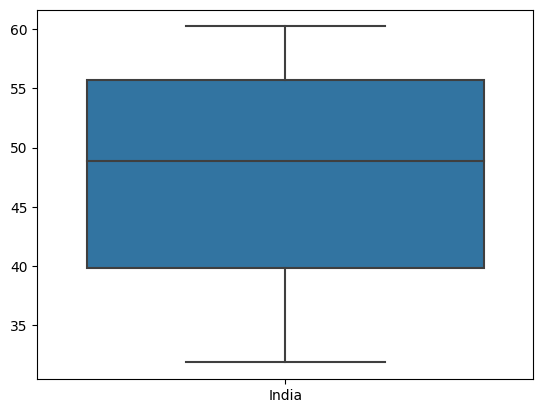

In [25]:
import seaborn as sns
sns.boxplot(india_data)

<Axes: >

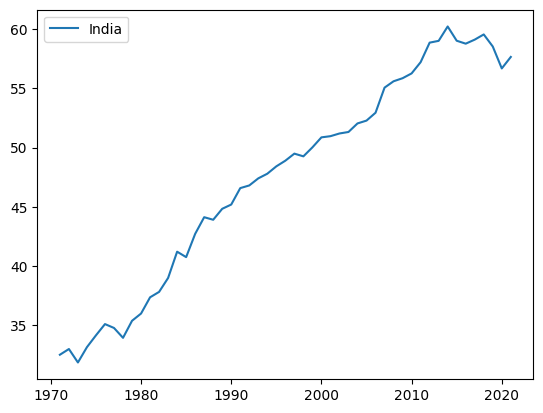

In [26]:
india_data.plot()

doing some transformations

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [28]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

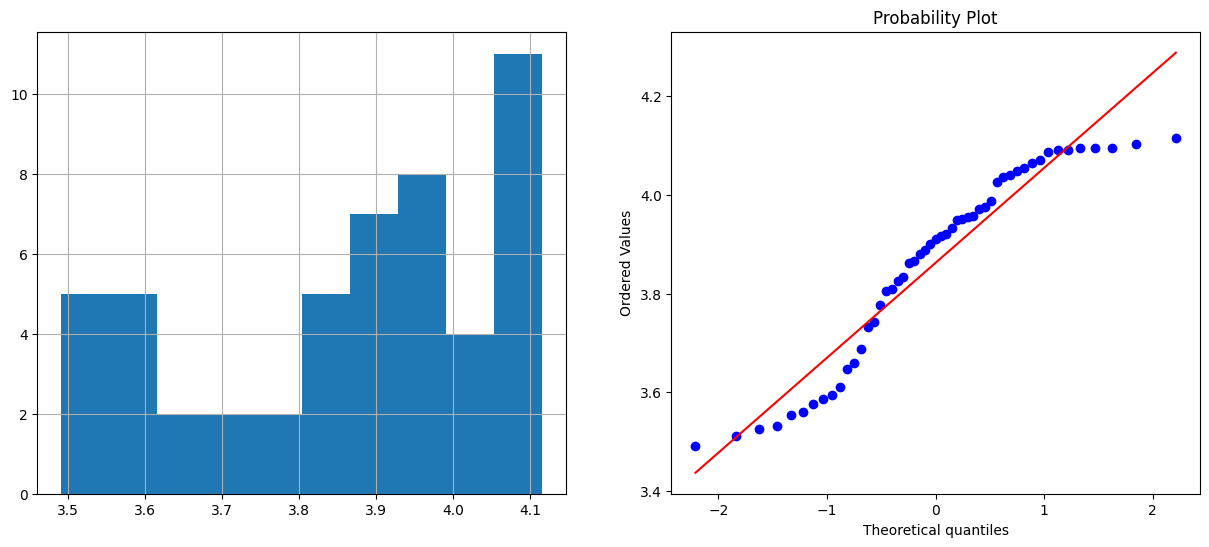

In [29]:
india_data['Log_data']=np.log(india_data['India']+1)
diagnostic_plots(india_data,'Log_data')

In [30]:
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

array([[-1.59182905, -1.59960027],
       [-1.54838084, -1.55576181],
       [-1.64999572, -1.65822341],
       [-1.53398731, -1.54123074],
       [-1.44262294, -1.4489114 ],
       [-1.3540299 , -1.35928474],
       [-1.38479574, -1.39041933],
       [-1.46208567, -1.4685883 ],
       [-1.32771309, -1.33264554],
       [-1.2695142 , -1.27371502],
       [-1.13680293, -1.13927495],
       [-1.09185413, -1.09373272],
       [-0.97426426, -0.97460089],
       [-0.74676246, -0.74429141],
       [-0.79451007, -0.79259932],
       [-0.58757233, -0.58338545],
       [-0.43562249, -0.43006171],
       [-0.45915652, -0.45378958],
       [-0.3577393 , -0.35159033],
       [-0.31794211, -0.31152547],
       [-0.16257977, -0.15534544],
       [-0.13710889, -0.12977663],
       [-0.06891286, -0.06137075],
       [-0.02398017, -0.01634238],
       [ 0.04792289,  0.05564156],
       [ 0.10349903,  0.11121792],
       [ 0.17328917,  0.18092967],
       [ 0.14640905,  0.15409022],
       [ 0.23569167,

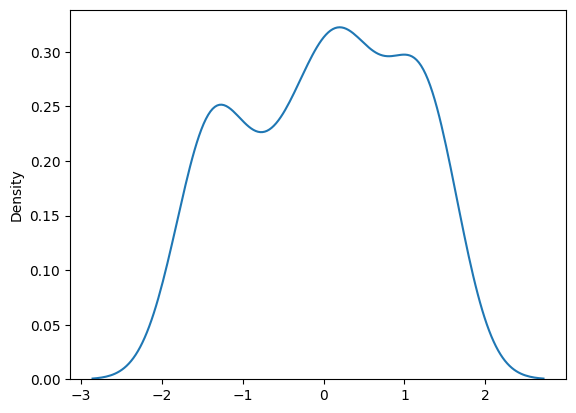

In [31]:
powertransformation = PowerTransformer(method='box-cox')
transformed_data = powertransformation.fit_transform(india_data)
sns.distplot(transformed_data, hist=False, kde=True)
transformed_data

In [32]:
india_data.drop(columns = 'Log_data', inplace = True)

In [33]:
india_data.head()

,India
1971,32.494
1972,32.977
1973,31.840
1974,33.136
1975,34.134


<Axes: >

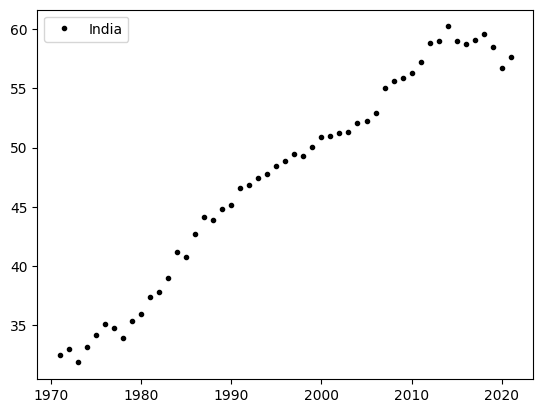

In [34]:
india_data.plot(style = 'k.')

testing for stationary data

In [35]:
india_data.index = pd.to_datetime(india_data.index, format='%Y')

In [36]:
split = india_data.values
split_length = round(len(split)/2)


In [37]:
split1= split[0: split_length]
split2 = split[split_length:]
print(split1.mean(), split2.mean())
print(split1.var(), split2.var())

40.08976923076922 55.11055999999999
32.26359294674556 13.058820486399998


so much variation in mean and variance data is not stationary

In [38]:
india_data.head()

,India
1971-01-01,32.494
1972-01-01,32.977
1973-01-01,31.840
1974-01-01,33.136
1975-01-01,34.134


In [39]:
train = india_data[:40]
test = india_data[40:]

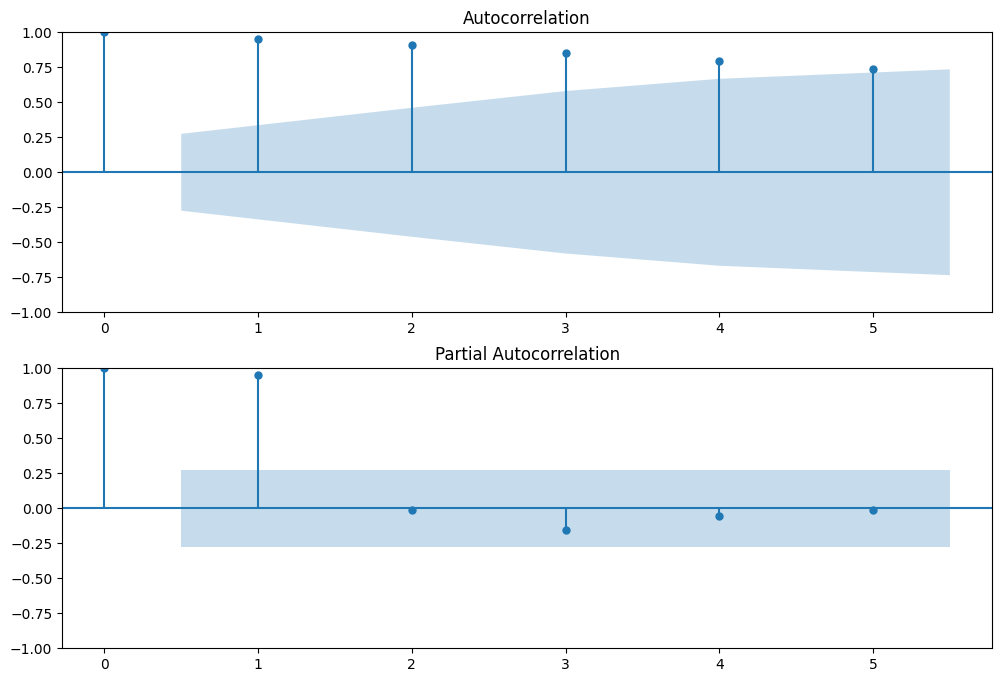

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(india_data, lags=5, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(india_data, lags=5, ax=ax2)

finding optimum pqd

In [41]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [42]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    
                except:
                    continue
    return best_cfg


In [43]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

(3, 1, 3)

In [44]:
model_arima = ARIMA(train['India'],order = (3,1,3))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  India   No. Observations:                   40
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -41.354
Date:                Thu, 10 Aug 2023   AIC                             96.708
Time:                        01:08:22   BIC                            108.353
Sample:                    01-01-1971   HQIC                           100.886
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7450      0.107     -6.965      0.000      -0.955      -0.535
ar.L2          0.8076      0.072     11.202      0.000       0.666       0.949
ar.L3          0.9371      0.103      9.092      0.000       0.735       1.139
ma.L1          0.8852      9.737      0.091      0.928     -18.199      19.969
ma.L2         -0.8585      1.942     -0.442      0.658      -4.665       2.948
ma.L3         -0.9882      9.828     -0.101      0.920     -20.250      18.273
sigma2         0.4088      4.036      0.101      0.919      -7.502       8.319
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.68   Prob(JB):                         0.43
Heteroskedasticity (H):               0.50   Skew:                            -0.07
Prob(H) (two-sided):                  0.23   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

2011-01-01    56.804653
2012-01-01    57.568263
2013-01-01    57.888155
2014-01-01    58.774143
2015-01-01    59.088055
2016-01-01    59.869515
2017-01-01    60.371151
2018-01-01    60.922741
2019-01-01    61.649276
2020-01-01    62.023598
2021-01-01    62.848406
Freq: AS-JAN, Name: predicted_mean, dtype: float64


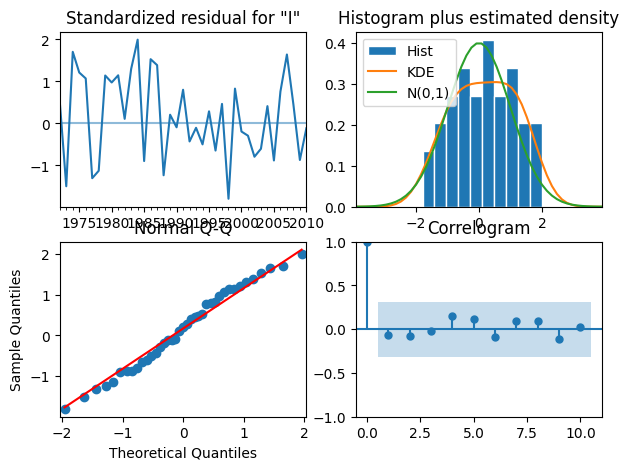

In [46]:
model_arima.plot_diagnostics(figsize=(7,5))
plt.show()

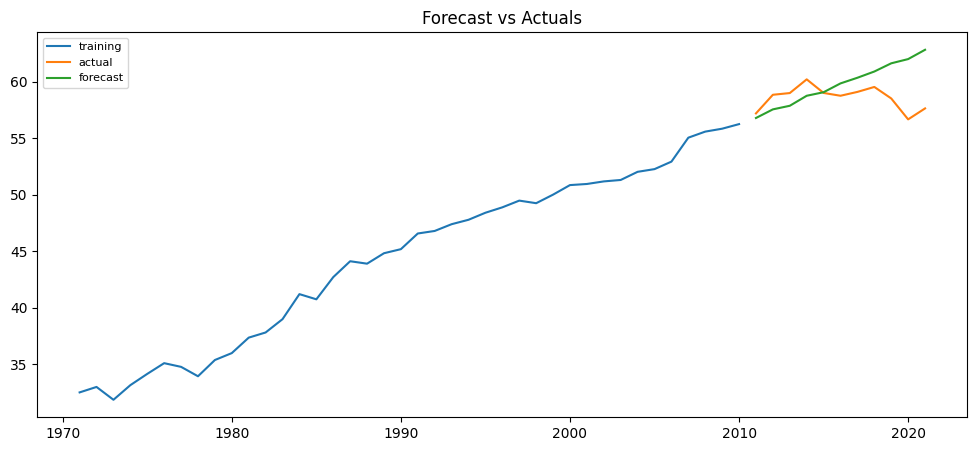

In [47]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_arima, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
me = np.mean(pred_arima - test.India)
mae = np.mean(np.abs(pred_arima - test.India))
mape = np.mean(np.abs((pred_arima - test.India) / test.India)) * 100

print("ME:", me)
print("MAE:", mae)
print("MAPE:", mape)

ME: 1.1953596372608688
MAE: 1.9735025897608636
MAPE: 3.397156565685765


final_model

In [49]:
model = ARIMA(india_data['India'], order=(3,1,3))
model= model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  India   No. Observations:                   51
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -58.497
Date:                Thu, 10 Aug 2023   AIC                            130.995
Time:                        01:08:25   BIC                            144.379
Sample:                    01-01-1971   HQIC                           136.091
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4952      0.251      1.976      0.048       0.004       0.986
ar.L2          0.5661      0.189      2.994      0.003       0.195       0.937
ar.L3         -0.2611      0.253     -1.033      0.301      -0.756       0.234
ma.L1         -0.4897      1.382     -0.354      0.723      -3.199       2.220
ma.L2         -0.6698      1.975     -0.339      0.735      -4.541       3.202
ma.L3          0.8127      1.050      0.774      0.439      -1.246       2.871
sigma2         0.5643      0.698      0.808      0.419      -0.805       1.933
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.94   Prob(JB):                         0.87
Heteroskedasticity (H):               0.89   Skew:                            -0.11
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model.fittedvalues.tail()

2017-01-01    59.480786
2018-01-01    58.836158
2019-01-01    59.364735
2020-01-01    57.854428
2021-01-01    56.776076
dtype: float64

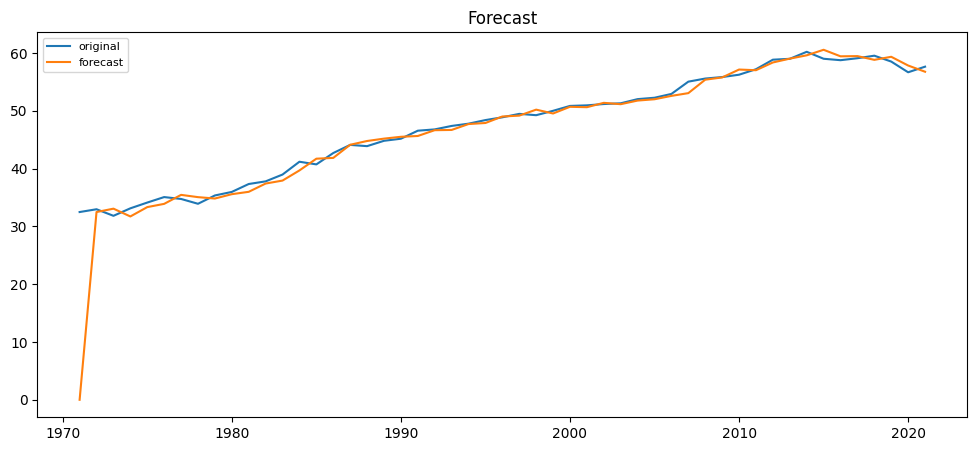

In [51]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(india_data, label='original')
#plt.plot(test, label='actual')
plt.plot(model.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [52]:
years = 10
future_dates=[india_data.index[-1]+ DateOffset(years=x)for x in range(0,years)]
future_df=pd.DataFrame(index=future_dates[1:],columns=india_data.columns)
future_df


,India
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN
2026-01-01,NaN
2027-01-01,NaN
2028-01-01,NaN
2029-01-01,NaN
2030-01-01,NaN


In [53]:
start = len(india_data)
end = (start + years)
future_df['India'] = model.predict(start = start, end = end, dynamic= True)

In [54]:
future_df

,India
2022-01-01,57.003173
2023-01-01,56.209441
2024-01-01,55.896868
2025-01-01,55.462716
2026-01-01,55.278029
2027-01-01,55.022431
2028-01-01,54.904669
2029-01-01,54.749892
2030-01-01,54.673321


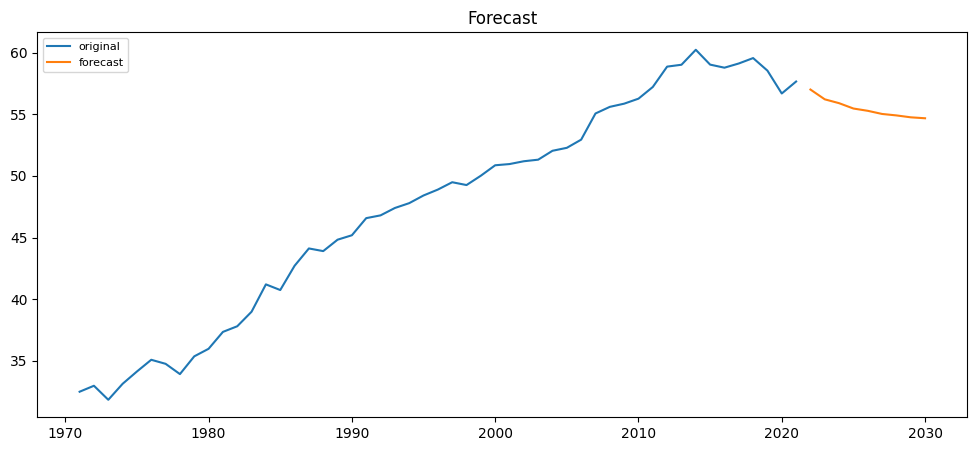

In [55]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(india_data, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df['India'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()